# Statistical Learning 

Suppose you are statistical consultant hired by a client to investigate the association between advertising and sales of a particular product. The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [1]:
# It is not possible for our client to directly increase sales of the product.On the other hand, they can control 
# the advertising expenditure in each of the 3 media. 
# Therefore,if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets.
# Thereby indirectly increasing sales. 

# In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the 3 media budgets. 

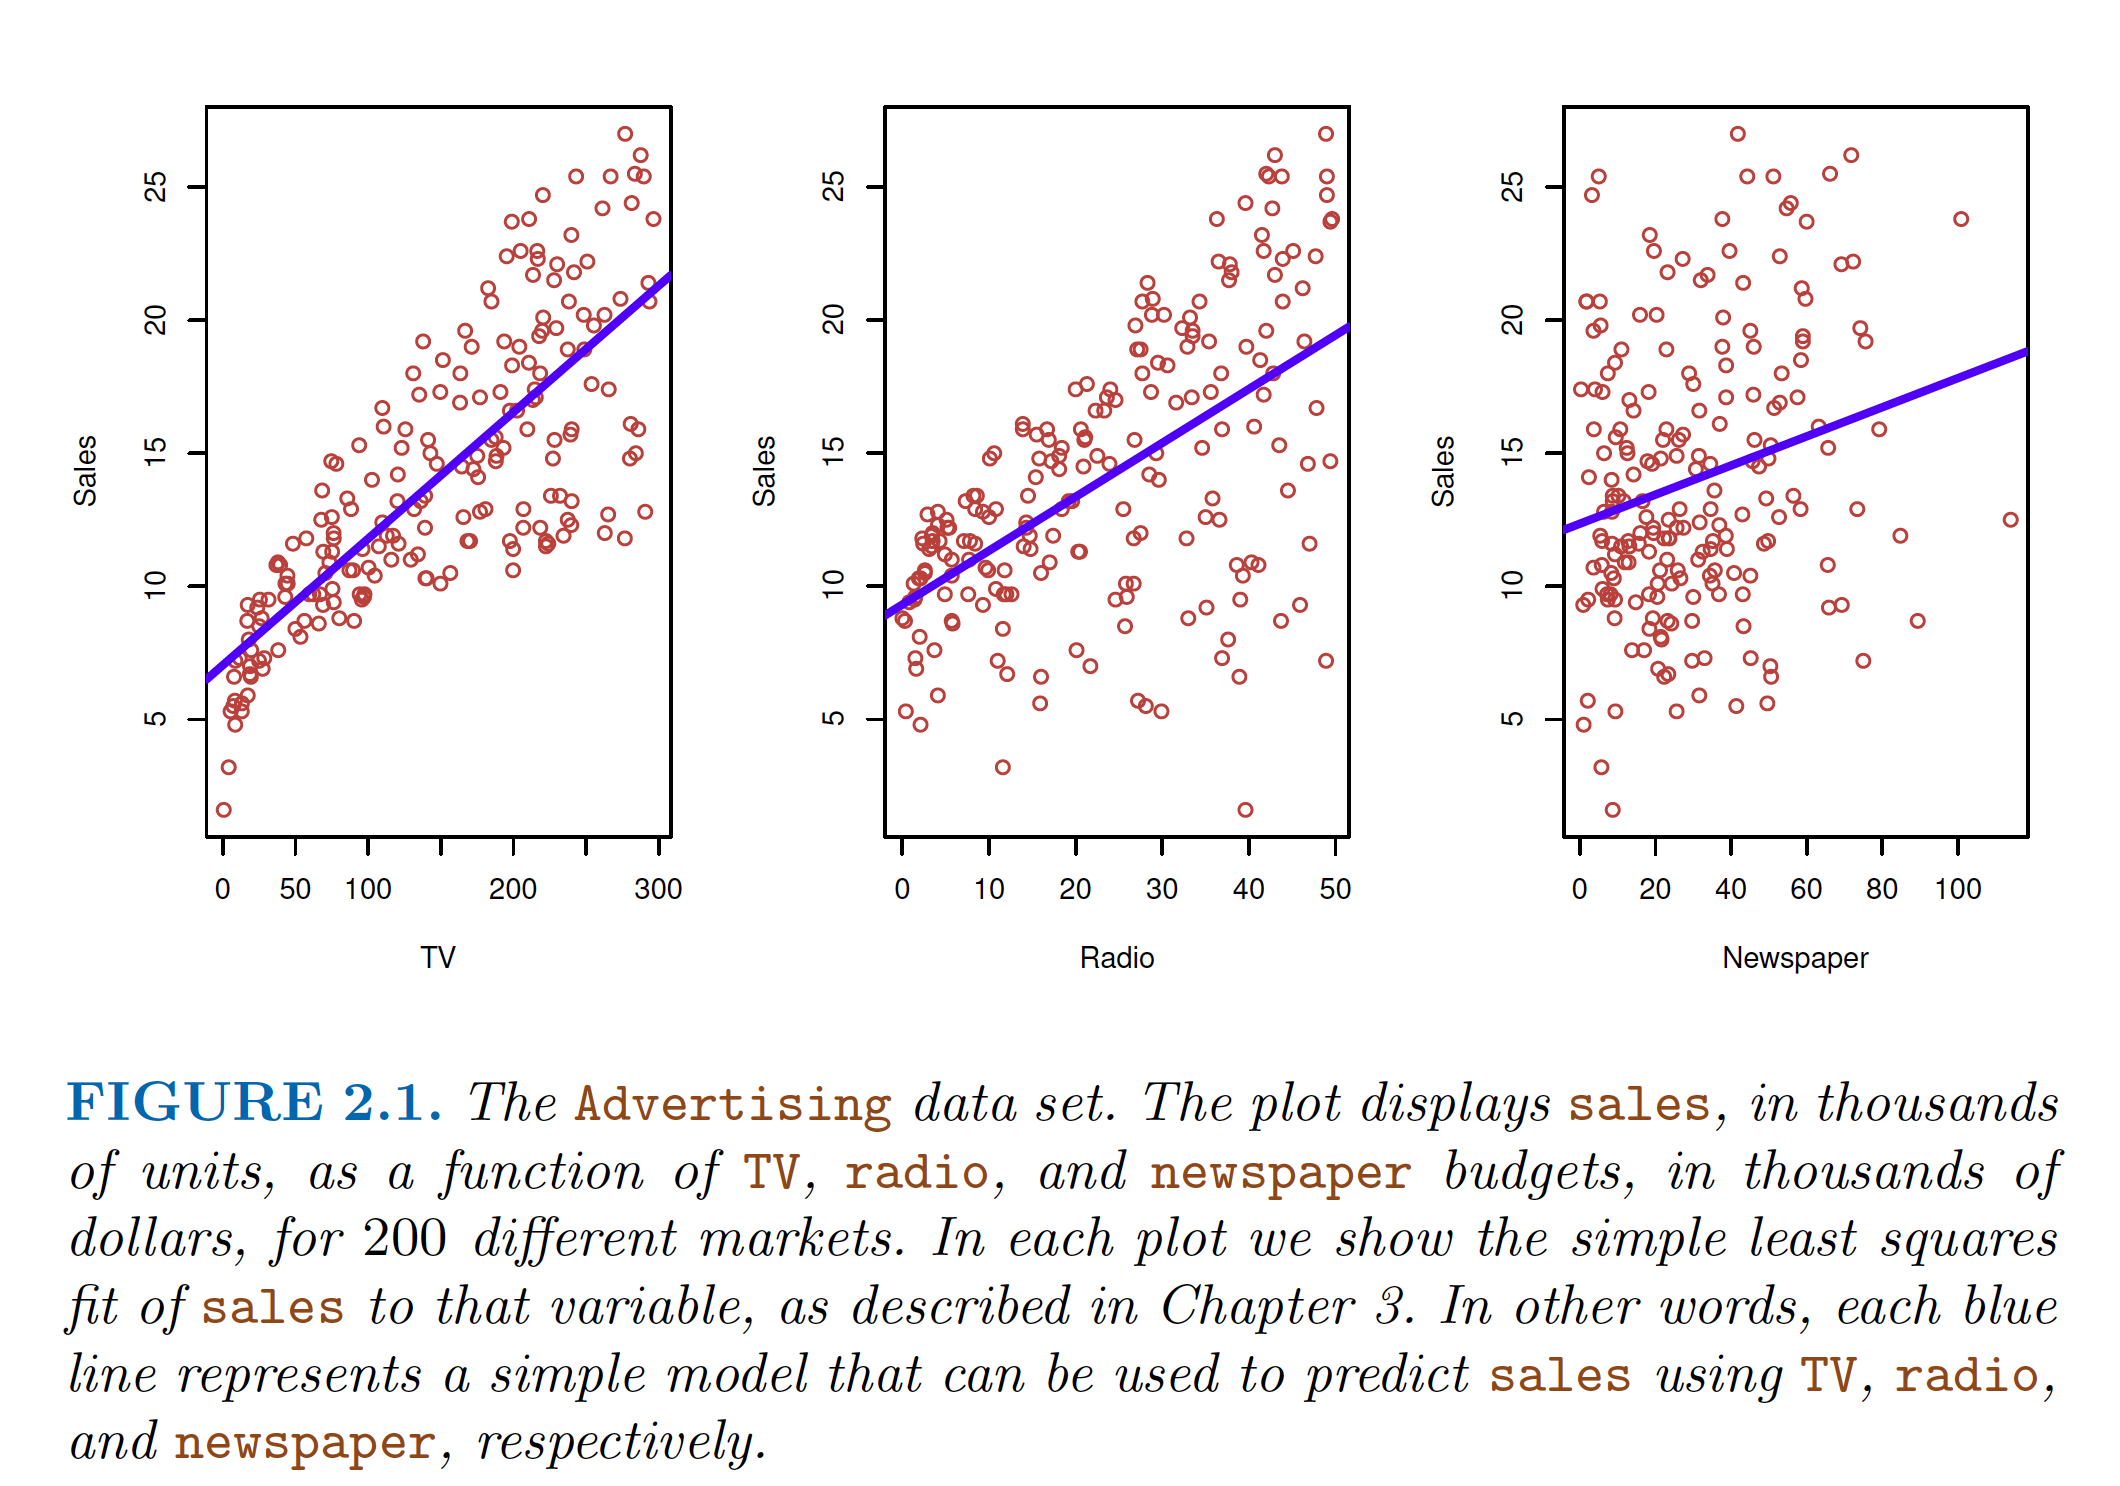

In [3]:
from IPython.display import Image
Image(filename='statistical_learning.png', width=800, height=800) 

In [4]:
# In this setting, the advertising budgets are input variables, while sales is an output variable. 
# The input variables are typically denoted using the symbol X, with a subscript to distinguish them. 
# So X1 might be the TV budget, X2 the radio budget, and X3 the newspaper budget. 
# The inputs go by different names such as predictors, independent variables, features or sometimes just variables. 
# The output variable in this case, sales is often called the response or dependent variable, and is typically denoted using the symbol Y. 

In [3]:
# More generally, suppose that we observe a quantitative response Y and p different predictors, X1, X2, . . . , Xp. 
# We assume that there is some relationship between Y and X=(X1, X2, . . . , Xp), which can be written in the very general form: 

# Y = f(X) + ε 
# Here f is some fixed but unknown function of X1, X2, . . . , Xp, and ε is a random error term, which is independent of X and has a mean of zero.
# In this formulation, f represents the systematic information that X provides about Y.  

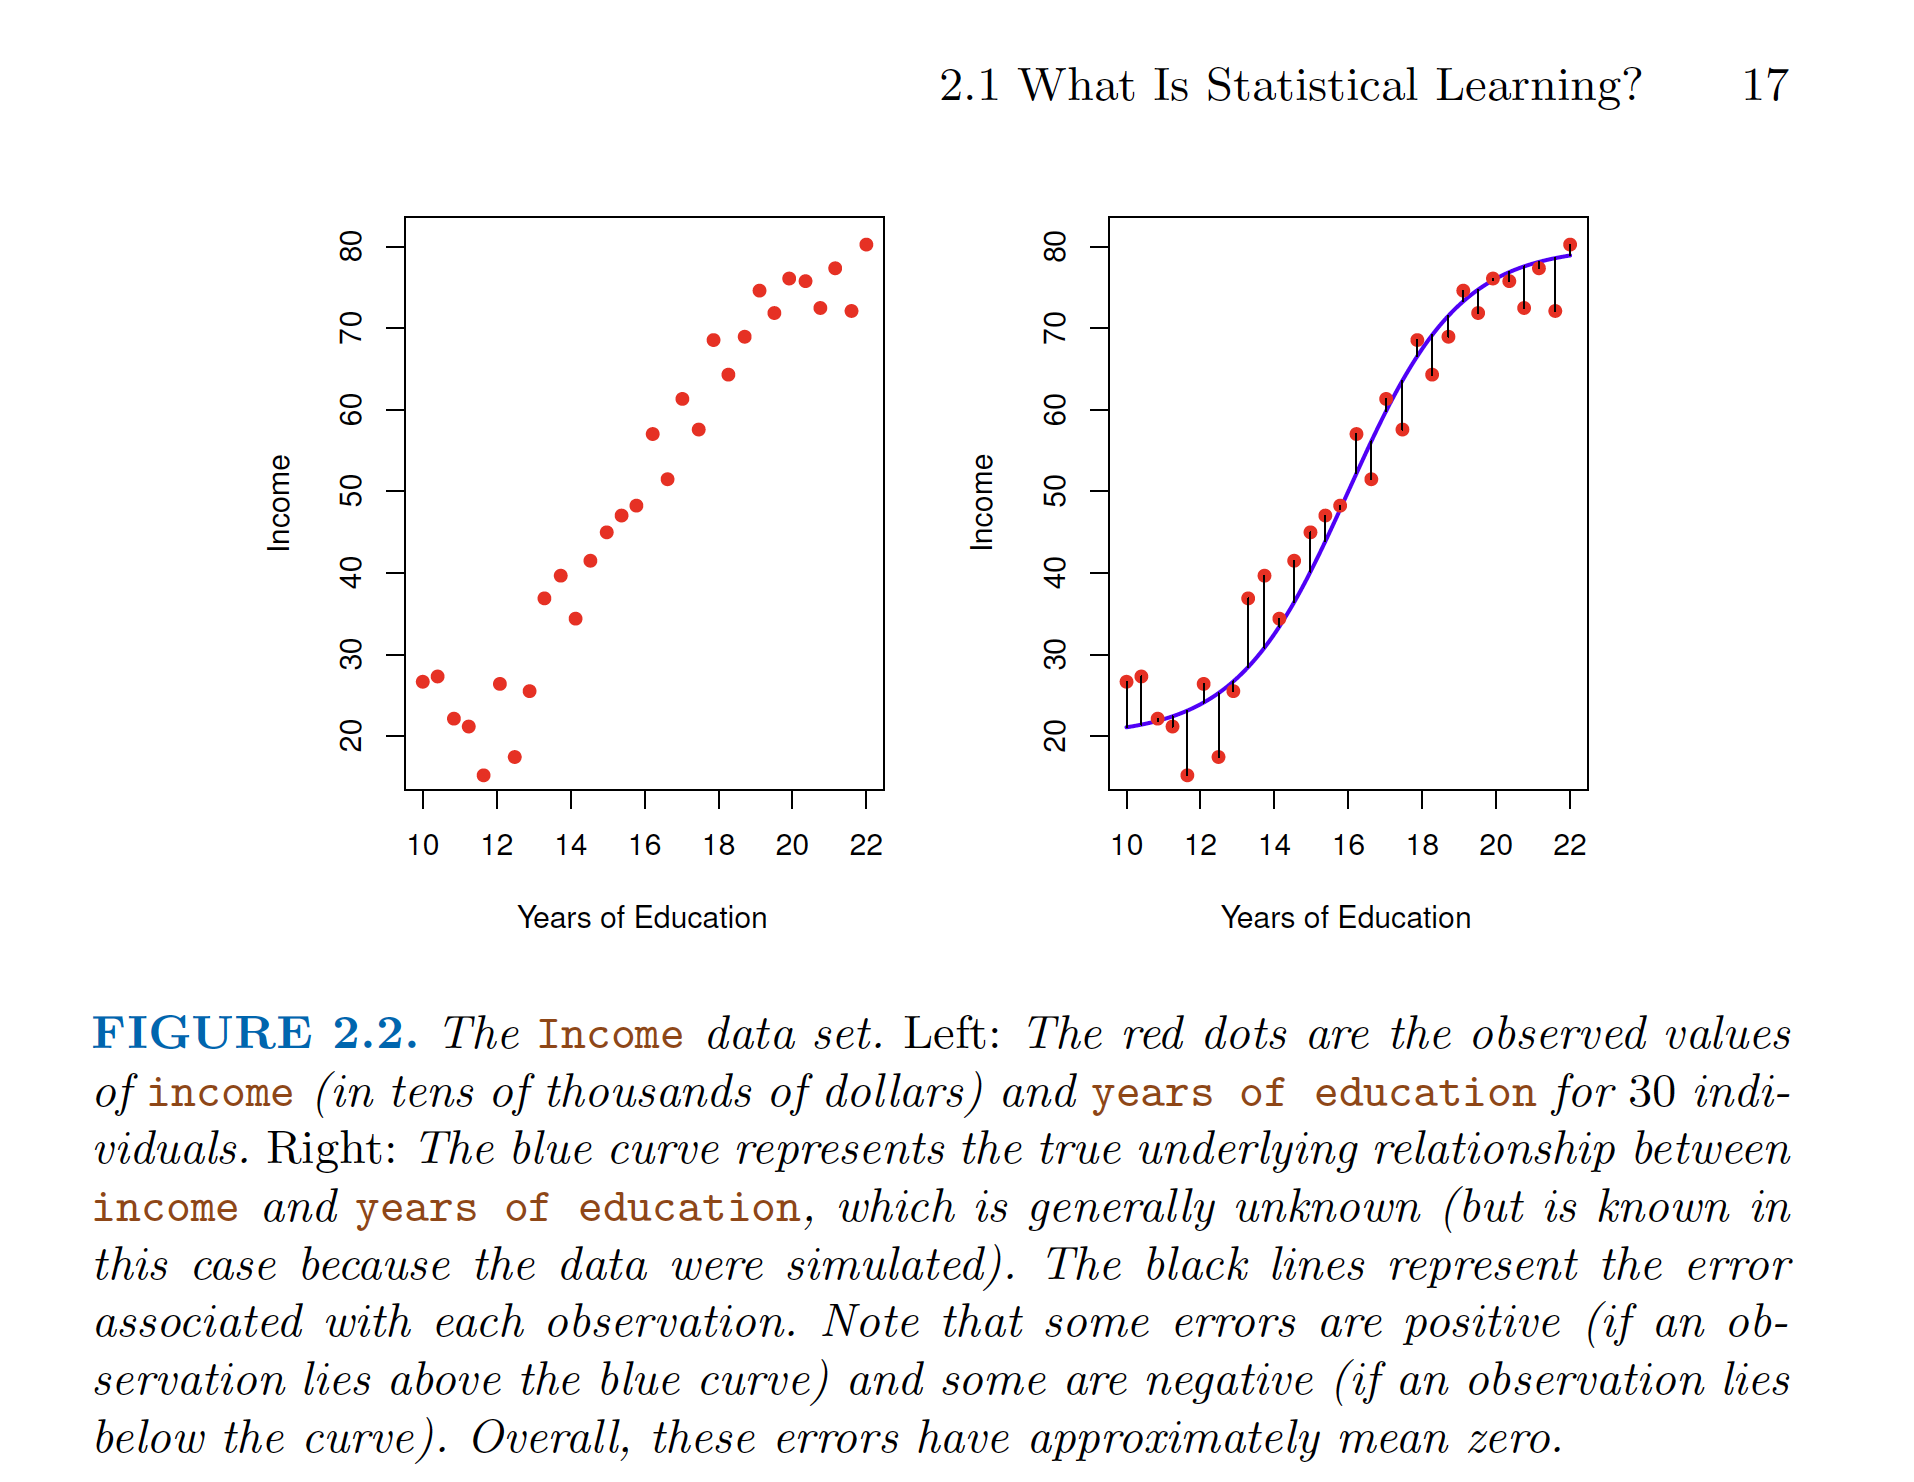

In [5]:
from IPython.display import Image
Image(filename='income_data.png',width=800, height=800) 

In [7]:
# As another example, consider the left-hand panel of Figure 2.2 a plot of income versus years of education for 30 individuals Income data set. 
# The plot suggests that one might be able to predict income using years of education.
# However, the function that connects input variable to the output variable is in general unknown. 
# In this sitaution one must estimate f, based on the observed data points. 
# Since Income is a simulated data set, f is known and is shown by the blue curve in the right-hand pael of Figure 2.2. 
# The vertical lines represent the error terms ε, which are independent of X and have a mean of zero. 
# In general,the function f may involve more than one input variable. 
# In Figure 2.3, we plot income as a function of "years of education" and "seniority" 
# Here f is a two-dimensional surface that must be estimated based on the observed data. 

In [8]:
# In essence, statistical learning refers to a set of approaches for estimating f. 
# The aim is to find a function f that accurately predicts Y, given the input X. 

# Why estimate f? 
There are two main reasons that we may wish to estimate the f: "prediction" and "inference".

# Prediction 
In many situations, a set of inputs X are readily available, but the output Y cannot be easily obtained. In this setting, since the error terms average to zero, we can predict Y using: Y^ = f(X). 

In [10]:
# Where f^ represents our estimate for f, and Y^ represents the resulting prediction for Y. 
# In this setting, f^ is often treated as a black box, in the sense that one is not typically concerned with the exact form of f^,
# provided that it yields accurate predictions for Y. 

In [11]:
# As an example, suppose that X1....Xp are characteristics of a patients blood sample that can be easily measured in a lab, and Y is a variable 
# encoding the patient's risk for a severe adverse reaction to a particular drug. 
# It is natural to seek predict Y using X, since we can then avoid giving the drug in question to patients who are at high risk of an adverse reaction. 
# that is, patients for whom the estimate of Y is high.

In [12]:
# The accuracy of Y^ as a prediction for Y depends on two quantities, which we will call the reducible error and the irreducible error. 
# In general f^ will not be a perfect estimate for f, and this inaccuracy will introduce some error. 
# This error is reducible because we can potentially improve the accuracy of f^ by using the most appropriate statistical learning technique to estimate f.
# However, even if it were possible to form a perfect estimate for f, so that our estimated response took the form Y^ = f(X), our prediction would still have some error in it.
# This is because Y is also a function of ε, which by definition cannot be predicted using X.
# This is known as irreducible error, because no matter how well we estimate f, we cannot reduce the error introduced by ε. 

In [13]:
# Why is the irreducible error larger than zero? 
# The quantity ε may contain unmeasured variables that are useful in predicting Y.
# since we don't measure them, f cannot use them for its prediction. 
# The quantity ε may also contain unmeasurable variation. 
# For example, the risk of an adverse reaction might vary for a given patient on a given day, depending on 
# the manufacturing variation in the drug itself or the patient's general feeling of well-being on that day.

Consider a given estimate f^ and  a set of predictors X. which yields the prediction Y^ = f^(X). Assume for a moment that both f^ and X are fixed, so that the only variability comes from the error term. 

Then, it is easy to show that E(Y^ - Y)^2 = E(f^(X) + e - Y)^2 
                                         = [f^(X) - f(X)]^2 + Var(e).
                                           reducible         irreducible error

                            
Where E(Y-Y^)^2 represents the average, or expected value, of the squared difference between the predicted and actual value of Y, and Var(e) represents the variance associated with the error term e. 


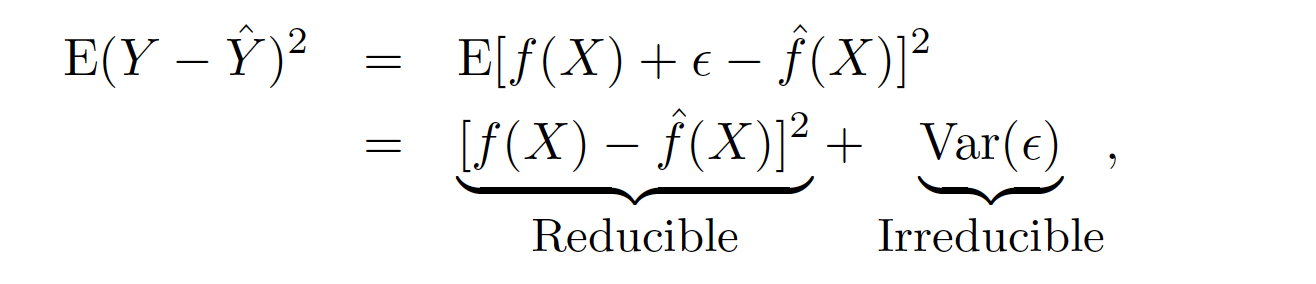

In [14]:
from IPython.display import Image 
Image(filename='estimate_function.png', width=800, height=800) 

# Inference

We are often interested in understanding the association between Y and X1, X2, ... Xp. In this case, we wish to estimate f, but our goal is not necessarily to make predictions for Y. We instead want to understand the relationship between X and Y, or more specifically, to understand how Y changes as a function of X1, X2, ... Xp.

In [ ]:
#Now f^ cannot be treated as a black box, because we are interested in understanding the exact form of f^. 
# In this setting, one may be interested in answering the following questions: 
# Which predictors are associated with the response? It is often the case that only a small fraction of the available 
# predictors are substantially associated with Y. Identifying the few important predictors among a large set of possible variables can be extremely useful,
# depending on the application. 

# What is the relationship between the response and each predictor? 
# Some predictors may have a positive relationship with Y, in the sense that larger values of the predictor are associated with larger values of Y. 
# Other predictors may have a negative relationship with Y.
# Depending on the complexity of f, the relationship between response(Y) and a given predictor(X) may also depend on the values of the other predictors. 



# Can the relationship between Y and each predictor be adequately summarized using a linear equation, or is the relationship more complicated? 

In [4]:
from ISLP import load_data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.diagnostic import het_arch 